<a href="https://colab.research.google.com/github/MiaMason13/NobelLaureate/blob/main/laureate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This project explores the Nobel Prize laureates dataset using Python and Pandas to uncover trends related to gender, nationality, award categories, and time. Through this analysis, we identify patterns in Nobel Prize distributions and highlight key insights.

**Our Questions:**

1. Which country has produced the most Nobel Prize winners?
2. What percent of winners are male and female?
3. What is the most awarded category?
4. Which decade has the greatest number of Nobel Prize recipients?
5. What is the average age at which laureates receive their Nobel Prize?
6. What is the average lifespan of Nobel Prize laureates?
7. Which individual has received the most Nobel Prizes?


*Load the Dataset:*

In [ ]:
import pandas as pd
df = pd.read_csv("laureate.csv")
df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901,physics,NaN,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903,physics,NaN,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


# *Checking for null values in the dataset:*
To start cleaning the data, we have to see what columns have values that are formatted incorrectly or are missing.

In [ ]:
df.isnull().sum()

,0
id,0
firstname,0
surname,2
born,19
died,299
bornCountry,2
bornCountryCode,2
bornCity,4
diedCountry,314
diedCountryCode,314


# *Dropping columns not useful for our analysis questions:*

Now that the columns with unsupported data have been found, we can then look at what columns of information we need to answer our questions.

Columns like the organization columns are useless because none of our questions need to derive data from those columns. And for columns that are mostly empty like overallMotivation can be dropped since they contain almost no information and are not needed to find answers.

In [ ]:
columns_to_drop = [
    'countryCode', 'deathCountry', 'deathCountryCode',
    'bornCity', 'bornCountryCode', 'diedCity', 'diedCountryCode',
    'city', 'organizationName', 'organizationCity',
    'organizationCountry', 'motivation', 'overallMotivation',
    'categoryFullName', 'name', 'diedCity'
]

df = df.drop(columns=columns_to_drop, errors='ignore')
df.head()

,id,firstname,surname,born,died,bornCountry,diedCountry,gender,year,category,share,country,decade
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),Germany,male,1901,physics,1,Germany,1900
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,the Netherlands,male,1902,physics,2,the Netherlands,1900
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,the Netherlands,male,1902,physics,2,the Netherlands,1900
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,France,male,1903,physics,2,France,1900
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,France,male,1903,physics,4,France,1900


# *Cleaning unsupported data values:*

Now that we removed unnecessary columns we can clean the columns we do have.

In the born and died date columns, there was a lot of missing data, but that data was formatted in different ways. Some dates only had a year but had 00-00 for the month and day. While other dates had no year, month or date and were listed as 0000-00-00.

Any date format that was not in the proper yyyy-mm-dd format were set to Nat (Not a Time) which is essentially a pandas feature used to lable datetime values as null.

Other missing or unformatted data is given a null value of NaN or Not a Number.

In [ ]:
df['born'] = pd.to_datetime(df['born'], errors='coerce')
df['died'] = pd.to_datetime(df['died'], errors='coerce')
df.tail()

,id,firstname,surname,born,died,bornCountry,diedCountry,gender,year,category,share,country,decade
1006,1041,John,Jumper,NaT,NaT,USA,NaN,male,2024,chemistry,4,United Kingdom,2020
1007,1042,Kang,Han,1970-11-27,NaT,South Korea,NaN,female,2024,literature,1,NaN,2020
1009,1044,Daron,Acemoglu,1967-09-03,NaT,Turkey,NaN,male,2024,economics,3,USA,2020
1010,1045,Simon,Johnson,NaT,NaT,United Kingdom,NaN,male,2024,economics,3,USA,2020
1011,1046,James,Robinson,NaT,NaT,NaN,NaN,male,2024,economics,3,USA,2020


# *Question 1: Which country has produced the most Nobel Prize winners?*

Question 1 looks to find the country with the most nobel prize winners. The country which a winner is deemed a country of is determined by the country in which they were born in.

In [ ]:
winners_by_country = df['bornCountry'].value_counts()
top_country = winners_by_country.idxmax()
top_count = winners_by_country.max()
print(f"The country with the most Nobel Prize winners is {top_country} with {top_count} winners.")

The country with the most Nobel Prize winners is USA with 297 winners.


# *Question 2: What percent of winners are male and female?*

Question 2 wants to find the percentage of male and female winners of the Nobel Prize. The number of males and females in the gender column is counted and divided by the total number of prize winners and then multiplied by 100 to find the percent.



<Axes: title={'center': 'Nobel Prize Winners by Gender'}>

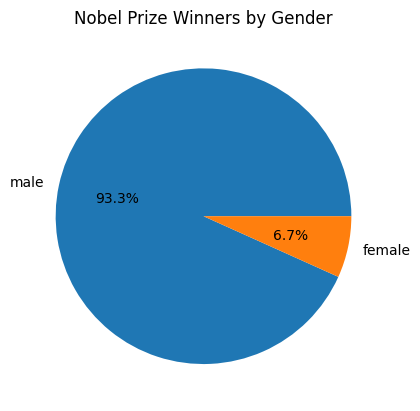

In [ ]:
df = df[df['gender'].isin(['male', 'female'])]
gender_counts = df['gender'].value_counts()
gender_percent = (gender_counts / gender_counts.sum()) * 100
gender_percent = gender_percent.round(2)
gender_percent.plot(kind='pie', autopct='%1.1f%%', title='Nobel Prize Winners by Gender', ylabel='')

# *Question 3: What is the most awarded category?*

Question 3 is looking for the nobel prize category that has the most awards presented. To find the most awarded category, each type of award is counted up.

<Axes: title={'center': 'Nobel Prize Winners by Category'}>

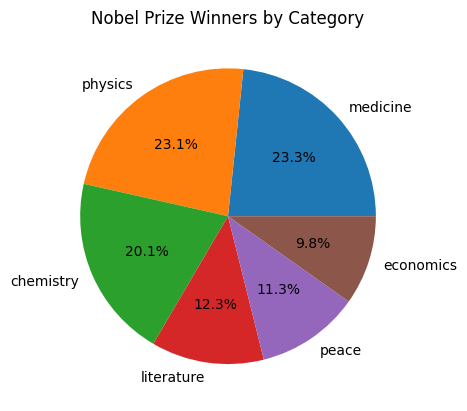

In [ ]:
df['category'].value_counts()
category_percent = (category_counts / category_counts.sum()) * 100
category_percent = category_percent.round(2)

category_percent.plot(kind='pie', autopct='%1.1f%%', title='Nobel Prize Winners by Category', ylabel='')



# *Question 4: Which decade has the greatest number of Nobel Prize recipients?*

Question 4 wants to know what decade had the most awards presented. This may seem like an odd question since only 6 awards are given each year for the 6 categories, however one award can have multiple recipients, therefore meaning more than 6 awards can be presented each year.

<Axes: title={'center': 'Nobel Prize Winners by Decade'}, xlabel='Decade', ylabel='Number of Winners'>

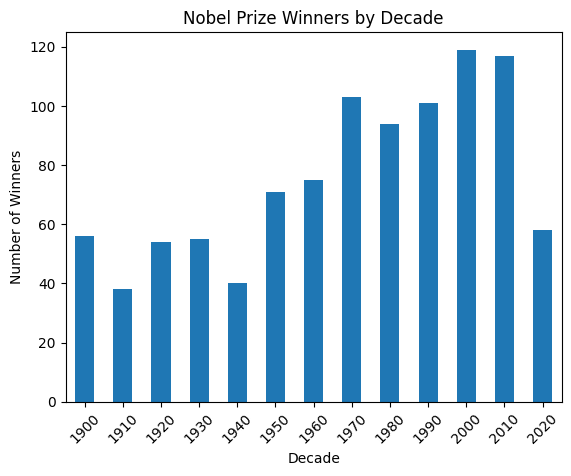

In [ ]:
df['year'] = pd.to_numeric(df['year'], errors = 'coerce')
df['decade'] = (df['year'] // 10) * 10

decade_counts = df['decade'].value_counts().sort_index()

decade_counts.plot(
     kind = 'bar',
     title = 'Nobel Prize Winners by Decade',
     xlabel = 'Decade',
     ylabel = 'Number of Winners',
     rot=45

 )

# *Question 5: What is the average age at which laureates receive their Nobel Prize?*

Question 5 is looking for the average age a person is when they recieve their nobel prize. To find the average, the ages are found by subtracting the awarded date to the born date of those who have valid datetime values. These ages are then added up and divided by the number of prize winners to find the average age.



In [ ]:
df_clean = df.dropna(subset=['born', 'year'])
df['born'] = pd.to_datetime(df['born'], errors = 'coerce')
df['year'] = pd.to_numeric(df['year'], errors = 'coerce')
df['birth_year'] = df['born'].dt.year
df['age_at_award'] = df['year'] - df['birth_year']

average_age = df_clean['age_at_award'].mean()
print(f"The average age at which laureates receive their Nobel Prize is approximately {average_age:.2f} years.")

The average age at which laureates receive their Nobel Prize is approximately 60.22 years.


# *Question 6: What is the average lifespan of Nobel Prize laureates?*

Question 6 is similar to question 5, however question 6 is looking for the average lifespan of the prize winners. To find this the death year and birth year are subtracted (out of the rows where both values are presesnt and not null). Then the ages are added up and divided by the number of recipiants.

In [ ]:
df_clean = df.dropna(subset=['born', 'died'])
df['born'] = pd.to_datetime(df['born'], errors = 'coerce')
df['died'] = pd.to_datetime(df['died'], errors = 'coerce')
df['lifespan'] = (df['died'] - df['born']).dt.days // 365
df_clean.loc[:, 'lifespan'] = (df_clean['died'] - df_clean['born']).dt.days // 365
average_lifespan = df_clean['lifespan'].mean()
print(f"Average lifespan: {average_lifespan:.2f} years")


Average lifespan: 80.71 years


<ipython-input-57-7146bdea254b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'lifespan'] = (df_clean['died'] - df_clean['born']).dt.days // 365


# *Question 7: Which individual has received the most Nobel Prizes?*

Question 7 is looking wfor the people who won multiple nobel prizes. This is a rare feat and the people who are awarded more than one are very renowned in their field. To find who has won more than one prize, we look to see who's name shows up more than once in the dataset.

In [ ]:
df['full_name'] = df['firstname'] + ' ' + df['surname']
prize_counts = df['full_name'].value_counts()
multiple_winners = prize_counts[prize_counts > 1]

print("Nobel Laureates Who Have Won Multiple Prizes:\n")

for name, count in multiple_winners.items():
    print(f"{name}: {count} times")

Nobel Laureates Who Have Won Multiple Prizes:

John Bardeen: 2 times
Linus Pauling: 2 times
Marie Curie: 2 times
Barry Sharpless: 2 times
Frederick Sanger: 2 times
